This program reads the generated data sets (training, validation and test, which were created with perform_split.ipynb) and plots histograms of their magnetizations. 

In [1]:
import numpy as np
import os
import math
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

#### Read Data

In [5]:
# constants 
T_c = 2 / (math.log(1 + math.sqrt(2)))
temperatures = [1.5, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, T_c, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 3.0, 3.5]

cpath = os.getcwd()
ppath = os.path.abspath(os.path.join(cpath, os.pardir))


# problem size
n=40
# name of the subfolder of the parent path in which the data sets are stored (sub-sub folders are also possible)
foldername = 'spin_configurations/01_data_split/samplesize_16000';

# generating feature paths
training_features_filename = 'training_features_'+str(n)+'.txt'
validation_features_filename = 'validation_features_'+str(n)+'.txt'
test_features_filename = 'test_features_'+str(n)+'.txt'
training_features_filepath = os.path.join(ppath, foldername, training_features_filename)
validation_features_filepath = os.path.join(ppath, foldername,validation_features_filename)
test_features_filepath = os.path.join(ppath, foldername,test_features_filename)

# generating phases paths
training_phases_filename = 'training_phases_'+str(n)+'.txt'
validation_phases_filename = 'validation_phases_'+str(n)+'.txt'
test_phases_filename = 'test_phases_'+str(n)+'.txt'
training_phases_filepath = os.path.join(ppath, foldername, training_phases_filename)
validation_phases_filepath = os.path.join(ppath, foldername,validation_phases_filename)
test_phases_filepath = os.path.join(ppath, foldername,test_phases_filename)

# generating temperatures paths
training_temperatures_filename = 'training_temperatures_'+str(n)+'.txt'
validation_temperatures_filename = 'validation_temperatures_'+str(n)+'.txt'
test_temperatures_filename = 'test_temperatures_'+str(n)+'.txt'
training_temperatures_filepath = os.path.join(ppath, foldername, training_temperatures_filename)
validation_temperatures_filepath = os.path.join(ppath, foldername,validation_temperatures_filename)
test_temperatures_filepath = os.path.join(ppath, foldername,test_temperatures_filename)

# generating magnetizations paths
training_magnetizations_filename = 'training_magnetizations_'+str(n)+'.txt'
validation_magnetizations_filename = 'validation_magnetizations_'+str(n)+'.txt'
test_magnetizations_filename = 'test_magnetizations_'+str(n)+'.txt'
training_magnetizations_filepath = os.path.join(ppath, foldername, training_magnetizations_filename)
validation_magnetizations_filepath = os.path.join(ppath, foldername,validation_magnetizations_filename)
test_magnetizations_filepath = os.path.join(ppath, foldername,test_magnetizations_filename)


training_features = np.genfromtxt(training_features_filepath, dtype='int', delimiter=',')
validation_features = np.genfromtxt(validation_features_filepath, dtype='int', delimiter=',')
test_features = np.genfromtxt(test_features_filepath, dtype='int', delimiter=',')
#features = np.stack((training_features, validation_features, test_features))
#features_df = pd.DataFrame({'training':training_features, 'validation':validation_features})

training_phases = np.genfromtxt(training_phases_filepath, dtype='int', delimiter=',')
validation_phases = np.genfromtxt(validation_phases_filepath, dtype='int', delimiter=',')
test_phases = np.genfromtxt(test_phases_filepath, dtype='int', delimiter=',')
#phases = np.stack((training_phases, validation_phases, test_phases))

training_temperatures = np.genfromtxt(training_temperatures_filepath, dtype='int', delimiter=',')
validation_temperatures = np.genfromtxt(validation_temperatures_filepath, dtype='int', delimiter=',')
test_temperatures = np.genfromtxt(test_temperatures_filepath, dtype='int', delimiter=',')
#temperatures = np.stack((training_temperatures, validation_temperatures, test_temperatures))

training_magnetizations = np.genfromtxt(training_magnetizations_filepath, dtype='float64', delimiter=',')
validation_magnetizations = np.genfromtxt(validation_magnetizations_filepath, dtype='float64', delimiter=',')
test_magnetizations = np.genfromtxt(test_magnetizations_filepath, dtype='float64', delimiter=',')
#magnetizations = np.stack((training_magnetizations, validation_magnetizations, test_magnetizations))


#training_magnetizations = np.mean((training_features*2)-1, axis=1)
#validation_magnetizations = np.mean((validation_features*2)-1, axis=1)
#test_magnetizations = np.mean((test_features*2)-1, axis=1)
#validation_magnetizations = np.genfromtxt(validation_magnetizations_filepath, dtype='float64', delimiter=',')
#test_magnetizations = np.genfromtxt(test_magnetizations_filepath, dtype='float64', delimiter=',')

all_magnetizations = np.concatenate((training_magnetizations,validation_magnetizations, test_magnetizations))

print(training_features.shape)
print(training_phases.shape)
print(training_temperatures.shape)
print(training_magnetizations.shape)

(11200, 1600)
(11200,)
(11200,)
(11200,)


In [3]:

print(np.unique(training_temperatures, return_counts=True))
print(np.unique(validation_temperatures, return_counts=True))
print(np.unique(test_temperatures, return_counts=True))


print(np.unique(training_phases, return_counts=True))
print(np.unique(validation_phases, return_counts=True))
print(np.unique(test_phases, return_counts=True))



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([700, 700, 700, 700, 700, 700, 700, 700, 700, 700, 700, 700, 700,
       700, 700, 700]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       150, 150, 150]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       150, 150, 150]))
(array([0, 1]), array([5600, 5600]))
(array([0, 1]), array([1200, 1200]))
(array([0, 1]), array([1200, 1200]))


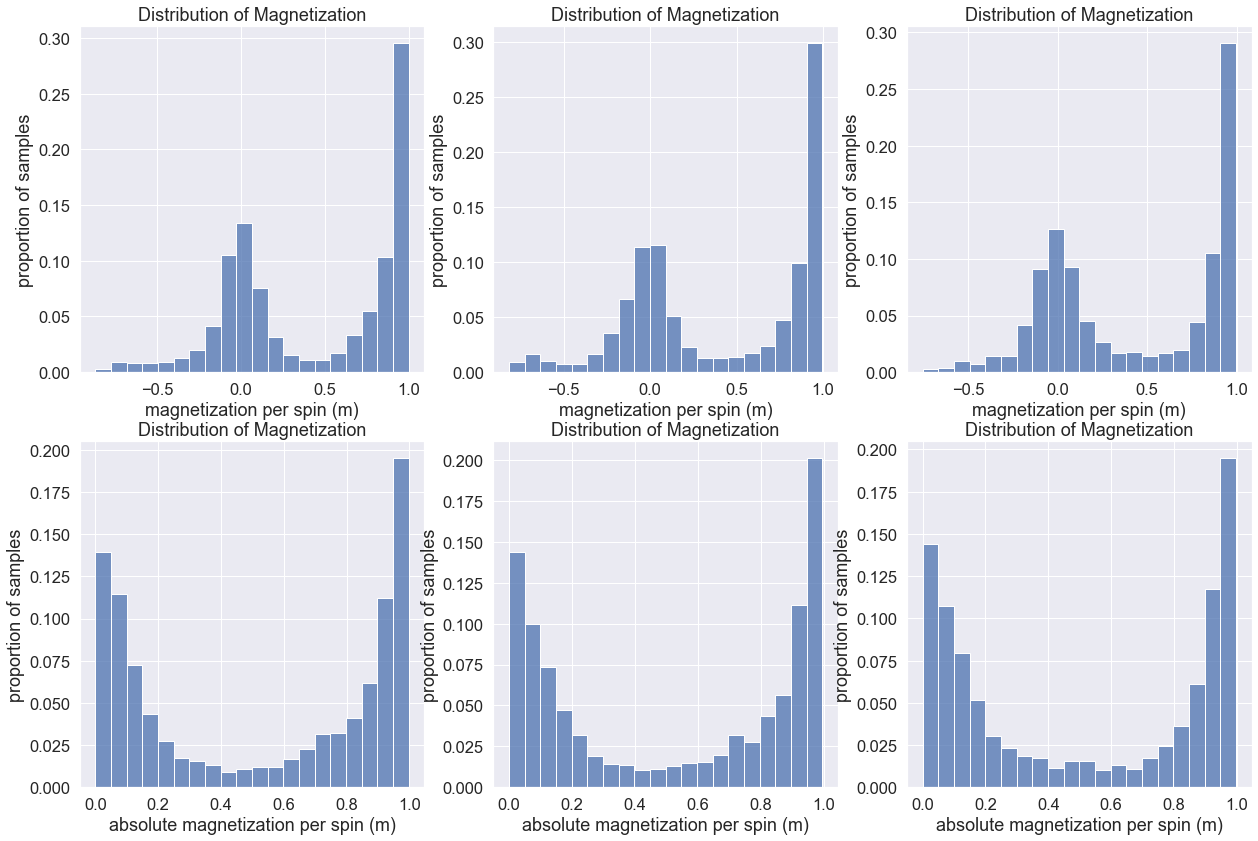

In [7]:
fig, axs = plt.subplots(2,3, figsize=(21,14))

sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)
axs[0,0].set(xlabel='magnetization per spin (m)', ylabel='proportion of samples', title='Distribution of Magnetization')
axs[0,1].set(xlabel='magnetization per spin (m)', ylabel='proportion of samples', title='Distribution of Magnetization')
axs[0,2].set(xlabel='magnetization per spin (m)', ylabel='proportion of samples', title='Distribution of Magnetization')

axs[1,0].set(xlabel='absolute magnetization per spin (m)', ylabel='proportion of samples', title='Distribution of Magnetization')
axs[1,1].set(xlabel='absolute magnetization per spin (m)', ylabel='proportion of samples', title='Distribution of Magnetization')
axs[1,2].set(xlabel='absolute magnetization per spin (m)', ylabel='proportion of samples', title='Distribution of Magnetization')

#sns.histplot(all_magnetizations, ax=axs[0,0], label='training', stat='probability', bins=20)

sns.histplot(training_magnetizations, ax=axs[0,0], label='training', stat='probability', bins=20)
sns.histplot(validation_magnetizations, ax=axs[0,1], label='validation', stat='probability', bins=20)
sns.histplot(test_magnetizations, ax=axs[0,2], label='test', stat='probability', bins=20)

sns.histplot(np.abs(training_magnetizations), ax=axs[1,0], label='training', stat='probability', bins=20)
sns.histplot(np.abs(validation_magnetizations), ax=axs[1,1], label='validation', stat='probability', bins=20)
sns.histplot(np.abs(test_magnetizations), ax=axs[1,2], label='test', stat='probability', bins=20)

plt.show()


